In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip
!unzip PRSA2017_Data_20130301-20170228.zip

--2023-03-25 12:34:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7959991 (7.6M) [application/x-httpd-php]
Saving to: ‘PRSA2017_Data_20130301-20170228.zip’

PRSA2017_Data_20130 100%[===================>]   7.59M  6.45MB/s    in 1.2s    

2023-03-25 12:34:30 (6.45 MB/s) - ‘PRSA2017_Data_20130301-20170228.zip’ saved [7959991/7959991]

Archive:  PRSA2017_Data_20130301-20170228.zip
   creating: PRSA_Data_20130301-20170228/
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_

In [ ]:
!head PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv  

"No","year","month","day","hour","PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","wd","WSPM","station"
1,2013,3,1,0,3,6,3,8,300,44,-0.9,1025.8,-20.5,0,"NW",9.3,"Shunyi"
2,2013,3,1,1,12,12,3,7,300,47,-1.1,1026.1,-21.3,0,"NW",9.4,"Shunyi"
3,2013,3,1,2,14,14,NA,7,200,22,-1.7,1026.2,-23,0,"NW",8.6,"Shunyi"
4,2013,3,1,3,12,12,3,5,NA,NA,-2.1,1027.3,-23.3,0,"NW",6.6,"Shunyi"
5,2013,3,1,4,12,12,3,NA,200,11,-2.4,1027.7,-22.9,0,"NW",4.5,"Shunyi"
6,2013,3,1,5,11,11,3,7,200,45,-2.8,1028.2,-22.1,0,"NNW",1.7,"Shunyi"
7,2013,3,1,6,12,12,3,9,300,74,-4,1029,-21.2,0,"NNE",1.6,"Shunyi"
8,2013,3,1,7,13,13,3,23,300,59,-2.4,1030.5,-21.3,0,"NE",1.7,"Shunyi"
9,2013,3,1,8,8,8,3,19,400,66,-1,1031.2,-21.8,0,"NNW",2.7,"Shunyi"


In [ ]:
def convert_to_date(x):
  return datetime.strptime(x,"%Y %m %d %H")

In [ ]:
#df = pd.read_csv("PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
df_sh = pd.read_csv("tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv", parse_dates = [['year','month', 'day','hour']], date_parser =convert_to_date )
#df.head()
#df['O3'].plot()
df.set_index('year_month_day_hour').groupby('station')[['O3']].plot()
#03 estimated 

FileNotFoundError: ignored

In [ ]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [ ]:
df['PM2.5'].fillna(value=df['PM2.5'].mean(), inplace=True)
df['PM10'].fillna(value=df['PM10'].mean(), inplace=True)
df['SO2'].fillna(value=df['SO2'].mean(), inplace=True)
df['NO2'].fillna(value=df['NO2'].mean(), inplace=True)
df['CO'].fillna(value=df['CO'].mean(), inplace=True)
df['O3'].fillna(value=df['O3'].mean(), inplace=True)
df['TEMP'].fillna(value=df['TEMP'].mean(), inplace=True)
df['PRES'].fillna(value=df['PRES'].mean(), inplace=True)
df['DEWP'].fillna(value=df['DEWP'].mean(), inplace=True)
df['RAIN'].fillna(value=df['RAIN'].mean(), inplace=True)
df['WSPM'].fillna(value=df['WSPM'].mean(), inplace=True)

In [ ]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [ ]:
df.drop(['No', 'year',	'month',	'day',	'hour',	'wd',	'station'], axis=1,inplace=True)
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4
1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7
2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0


In [ ]:
df=df.reset_index(drop=True).T.reset_index() 
df

,index,0,1,2,3,4,5,6,7,8,...,35054,35055,35056,35057,35058,35059,35060,35061,35062,35063
0,PM2.5,4.0,8.0,7.0,6.0,3.0,5.0,3.0,3.0,3.0,...,5.0,6.0,12.0,12.0,13.0,12.0,13.0,16.0,21.0,19.0
1,PM10,4.0,8.0,7.0,6.0,3.0,5.0,3.0,6.0,6.0,...,5.0,19.0,18.0,23.0,29.0,29.0,37.0,37.0,44.0,31.0
2,SO2,4.0,4.0,5.0,11.0,12.0,18.0,18.0,19.0,16.0,...,4.0,4.0,5.0,6.0,5.0,5.0,7.0,10.0,12.0,10.0
3,NO2,7.0,7.0,10.0,11.0,12.0,18.0,32.0,41.0,43.0,...,8.0,8.0,9.0,13.0,22.0,35.0,45.0,66.0,87.0,79.0
4,CO,300.0,300.0,300.0,300.0,300.0,400.0,500.0,500.0,500.0,...,100.0,100.0,200.0,200.0,300.0,400.0,500.0,700.0,700.0,600.0
5,O3,77.0,77.0,73.0,72.0,72.0,66.0,50.0,43.0,45.0,...,117.0,122.0,122.0,120.0,109.0,95.0,81.0,58.0,35.0,42.0
6,TEMP,-0.7,-1.1,-1.1,-1.4,-2.0,-2.2,-2.6,-1.6,0.1,...,14.6,15.4,14.9,14.2,13.4,12.5,11.6,10.8,10.5,8.6
7,PRES,1023.0,1023.2,1023.5,1024.5,1025.2,1025.6,1026.5,1027.4,1028.3,...,1013.3,1013.0,1012.6,1012.5,1013.0,1013.5,1013.6,1014.2,1014.4,1014.1
8,DEWP,-18.8,-18.2,-18.2,-19.4,-19.5,-19.6,-19.1,-19.1,-19.2,...,-15.6,-15.0,-15.4,-14.9,-15.5,-16.2,-15.1,-13.3,-12.9,-15.9
9,RAIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ts_code = df['index'].astype('category').cat.codes.values
ts_code

array([ 5,  4,  8,  2,  0,  3,  9,  6,  1,  7, 10], dtype=int8)

In [ ]:
df_train = df.iloc[:,1:28052].values
#df_train=pd.DataFrame(df_train)
df_test = df.iloc[:,28052:].values
#df_test=pd.DataFrame(df_test)
print(df_train.shape, df_test.shape)

(11, 28051) (11, 7013)


In [ ]:
!pip install --upgrade mxnet==1.6.0
!pip install gluonts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName
from gluonts.mx import DeepAREstimator,TemporalFusionTransformerEstimator, NBEATSEstimator
from gluonts.mx import TransformerEstimator, WaveNetEstimator
from gluonts.mx import Trainer
from tqdm import tqdm

/usr/local/lib/python3.9/dist-packages/gluonts/json.py:101: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [ ]:
freq= '1D'
start_train = start = pd.Period("01-01-2019") 
start_test = pd.Timestamp("2014-11-07") 
prediction_length = 6

train_ds = ListDataset(
    [
        {
            FieldName.TARGET: target,
            FieldName.START: start_train,
            FieldName.FEAT_STATIC_CAT: fsc
        }for(target,fsc) in zip(df_train,ts_code.reshape(-1,1))
    ],
    freq = freq
)

test_ds = ListDataset(
    [
        {
            FieldName.TARGET: target,
            FieldName.START: start_test,
            FieldName.FEAT_STATIC_CAT: fsc
        }for(target,fsc) in zip(df_test,ts_code.reshape(-1,1))
    ],
    freq = freq
)

In [ ]:


estimators = {
              'DeepAREstimator':DeepAREstimator,
              'TemporalFusionTransformerEstimator': TemporalFusionTransformerEstimator, 
              'NBEATSEstimator': NBEATSEstimator, 
              'TransformerEstimator': TransformerEstimator
              }

smape = pd.DataFrame(estimators, index = ['MAPE'])

for name,e in estimators.items():
    estimator = e( 
                    freq = "1D",
                    context_length = 6,#increase
                    prediction_length = prediction_length,
                    trainer = Trainer(epochs=3)
                  )
    predictor = estimator.train(training_data = train_ds)
    forecast_it, ts_it = make_evaluation_predictions(
                            dataset=test_ds,
                            predictor = predictor,
                            #num_samples=100#remove
                            )
  

  
    tss = list(tqdm(ts_it,total=len(df_test)))
    forecasts = list(tqdm(forecast_it,total=len(df_test)))  

    evaluator = Evaluator(quantiles=[0.1,0.5, 0.9])
    agg_metrics, item_metrics = evaluator(tss, forecasts)
    print(name,":MAPE-" ,agg_metrics['MAPE'])
    smape[name] = agg_metrics['MAPE']

100%|██████████| 50/50 [00:23<00:00,  2.10it/s, epoch=3/3, avg_epoch_loss=4.01]


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Running evaluation: 11it [00:00, 235.43it/s]
/usr/local/lib/python3.9/dist-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)


DeepAREstimator :MAPE- 0.48719138155380887


100%|██████████| 50/50 [00:25<00:00,  1.92it/s, epoch=3/3, avg_epoch_loss=10.4]


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Running evaluation: 11it [00:00, 237.99it/s]
/usr/local/lib/python3.9/dist-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)


TemporalFusionTransformerEstimator :MAPE- 0.5413499294624974


100%|██████████| 50/50 [00:24<00:00,  2.04it/s, epoch=3/3, avg_epoch_loss=8.74]


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Running evaluation: 11it [00:00, 46.51it/s]
/usr/local/lib/python3.9/dist-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)


NBEATSEstimator :MAPE- 0.5153033991654714


100%|██████████| 50/50 [00:22<00:00,  2.20it/s, epoch=3/3, avg_epoch_loss=4.65]


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Running evaluation: 11it [00:00, 99.86it/s]


TransformerEstimator :MAPE- 0.6361877898375192


/usr/local/lib/python3.9/dist-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)


In [ ]:
smape

,DeepAREstimator,TemporalFusionTransformerEstimator,NBEATSEstimator,TransformerEstimator
MAPE,0.487191,0.54135,0.515303,0.636188


In [ ]:
tft_estimator = TemporalFusionTransformerEstimator( 
                            freq = "1D",
                            context_length = 10,
                            prediction_length = prediction_length,
                            trainer = Trainer(epochs=10)
                            )
predictor = tft_estimator.train(training_data = train_ds)

100%|██████████| 50/50 [00:35<00:00,  1.39it/s, epoch=10/10, avg_epoch_loss=13.8]


In [ ]:
deepar_estimator = DeepAREstimator( freq = "1D",
                            context_length = 10,
                            prediction_length = prediction_length,
                            use_feat_static_cat = True,
                            cardinality = [1],
                            num_layers= 2,
                            num_cells= 32,
                            cell_type='lstm',
                            trainer = Trainer(epochs=10)
                            )
predictor = deepar_estimator.train(training_data = train_ds)

100%|██████████| 50/50 [00:23<00:00,  2.12it/s, epoch=10/10, avg_epoch_loss=3.7]


In [ ]:
from gluonts.evaluation.backtest import make_evaluation_predictions
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds,
    predictor = predictor,
    #num_samples=100
)

from tqdm.autonotebook import tqdm
print("Obtaining time Series conditioning values...") 
#forecasts = list(forecast_it)
tss = list(tqdm(ts_it,total=len(df_test)))
print("Obtaining time Series predictions...") 
forecasts = list(tqdm(forecast_it,total=len(df_test)))

Obtaining time Series conditioning values...


<ipython-input-15-046bff690068>:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/11 [00:00<?, ?it/s]

Obtaining time Series predictions...


  0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = prediction_length
    prediction_intervals = (80.0, 95.0)
    legend = ["observations", "median prediction"] + [
        f"{k}% prediction interval" for k in prediction_intervals
    ][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color="g")
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

In [ ]:
df_check = pd.DataFrame(data = tss[0][-prediction_length:])
df_check.rename(columns={0:'Original Time Series(TS_Entry)'}, inplace=True)
df_check['Precticted Values(Forecast Mean)'] = forecasts[0].mean
df_check['Values in Test Dataset'] = df_test[0:1,:][0][-prediction_length:]

In [ ]:
df_check

,Original Time Series(TS_Entry),Precticted Values(Forecast Mean),Values in Test Dataset
2034-01-13,13.0,6.964755,13.0
2034-01-14,12.0,14.486499,12.0
2034-01-15,13.0,15.431872,13.0
2034-01-16,16.0,11.836090,16.0
2034-01-17,21.0,11.885519,21.0
2034-01-18,19.0,7.650761,19.0


  0%|          | 0/6 [00:00<?, ?it/s]

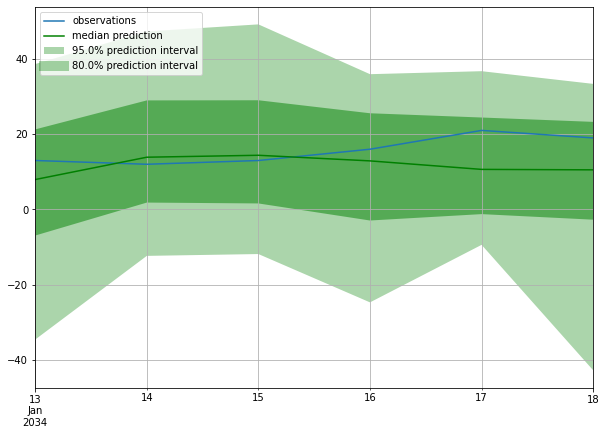

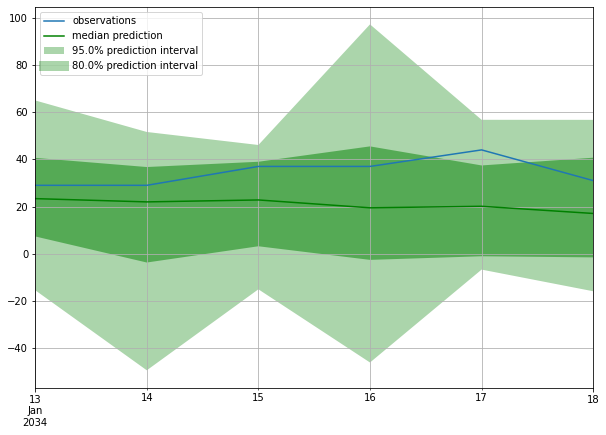

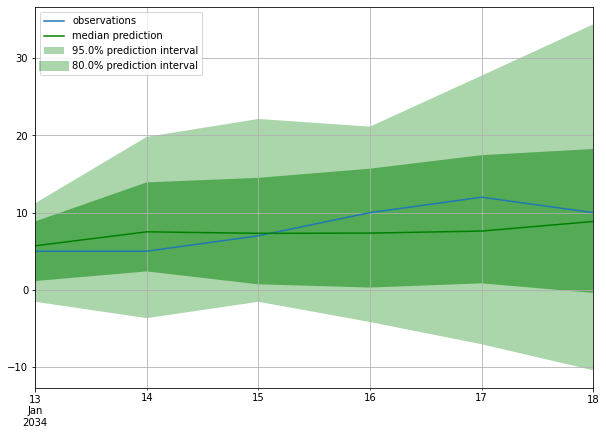

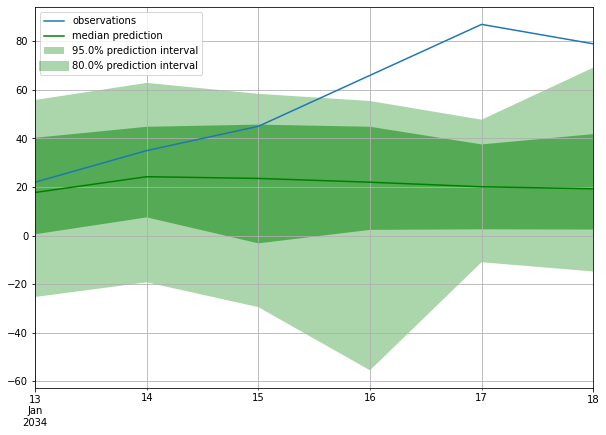

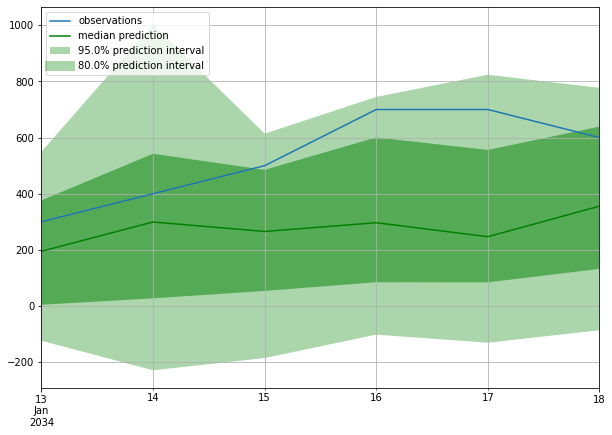

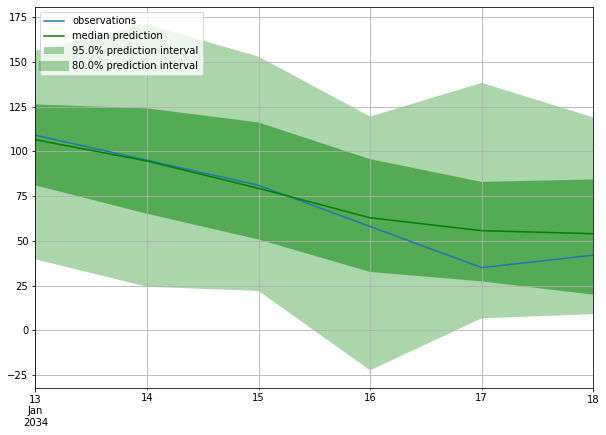

In [ ]:
for i in tqdm(range(6)):
  ts_entry = tss[i]
  forecast_entry = forecasts[i]
  plot_prob_forecasts(ts_entry, forecast_entry)


In [ ]:
from gluonts.evaluation import Evaluator
evaluator = Evaluator(quantiles=[0.1,0.5, 0.9])
agg_metrics, item_metrics = evaluator(tss, forecasts)

Running evaluation: 11it [00:00, 197.78it/s]
/usr/local/lib/python3.9/dist-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)


In [ ]:
item_metrics

,item_id,forecast_start,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,ND,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,None,2034-01-13,46.289668,30.268799,94.000000,15.666667,10.798437,0.467179,0.297671,0.362323,0.322008,5.816902,20.893810,0.0,30.268799,0.333333,11.700581,1.000000
1,None,2034-01-13,216.806986,82.177254,207.000000,34.500000,15.254202,0.897865,0.380921,0.484988,0.396992,5.699925,41.059082,0.0,82.177254,0.000000,19.757297,0.833333
2,None,2034-01-13,4.049460,11.719796,49.000000,8.166667,1.859916,1.050209,0.238980,0.242016,0.239180,14.781327,8.812015,0.0,11.719797,0.500000,7.937432,1.000000
3,None,2034-01-13,1783.180827,207.193695,334.000000,55.666667,8.120476,4.252495,0.528481,0.778598,0.620340,59.364996,64.377773,0.0,207.193689,0.000000,199.930274,0.500000
4,None,2034-01-13,77955.807292,1541.125244,3200.000000,533.333333,200.281651,1.282465,0.450306,0.600547,0.481602,4.469275,562.699255,0.0,1541.125320,0.000000,516.881268,0.500000
5,None,2034-01-13,108.793803,42.133060,420.000000,70.000000,12.280394,0.571820,0.167887,0.139086,0.100317,10.547490,28.675284,0.0,42.133060,0.500000,41.804320,1.000000
6,None,2034-01-13,0.336320,3.767335,67.400002,11.233334,0.858186,0.731647,0.057230,0.059744,0.055895,32.704936,6.741274,0.0,3.767335,0.166667,5.933801,1.000000
7,None,2034-01-13,3652.350911,394.538086,6082.800293,1013.800049,0.431855,152.264701,0.064851,0.067587,0.064861,1490.961803,255.325256,0.0,394.538086,0.000000,111.616980,1.000000
8,None,2034-01-13,4.283313,11.120460,88.900002,14.816667,0.694975,2.666874,0.119305,0.130337,0.125090,17.938229,2.141262,0.0,11.120460,1.000000,5.698196,1.000000
9,None,2034-01-13,207.287882,78.518692,0.000000,0.000000,0.093635,139.759738,NaN,2.000000,inf,866.763014,68.061356,1.0,78.518692,1.000000,25.001994,1.000000


In [ ]:
agg_metrics['MAPE']

0.2625014434258143